# TASK 2  MOVIE RATING PREDICTION WITH PYTHON

In [ ]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # This is what defines plt
import seaborn as sns  #  Defines sns for seaborn plots
from sklearn.impute import SimpleImputer # Import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# --- Function to View Table ---
def show_table(data, rows=5, title=""):
    print(f"\n--- {title or 'Preview'} (Top {rows} rows) ---")
    display(data.head(rows))

In [ ]:
# preview the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
#get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# get summary statistics of the datset
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [ ]:
df.shape

(15509, 10)

# Data Preparation

In [ ]:
# --- Initial Cleaning ---
df.dropna(subset=['Rating'], inplace=True)
df['Genre'].fillna('Unknown', inplace=True)
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)
df['Duration'].fillna(df['Duration'].median(), inplace=True)
df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [ ]:
df.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
# Convert Year and Votes to numeric
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(int)
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [ ]:
show_table(df, title="After Basic Cleaning")


--- After Basic Cleaning (Top 5 rows) ---


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# EDA (Exploratory data Analysis)

#Top 10 Movies


In [ ]:
# find top 10 movies based on rating
top_movie = df.loc[df['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94.0,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79.0,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,134.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
5077,Gho Gho Rani,2019,105.0,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
14222,The Reluctant Crime,2020,113.0,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,2021,93.0,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
11843,Refl3ct,2021,65.0,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar
8344,Love Sorries,2021,101.0,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,2021,56.0,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90.0,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma


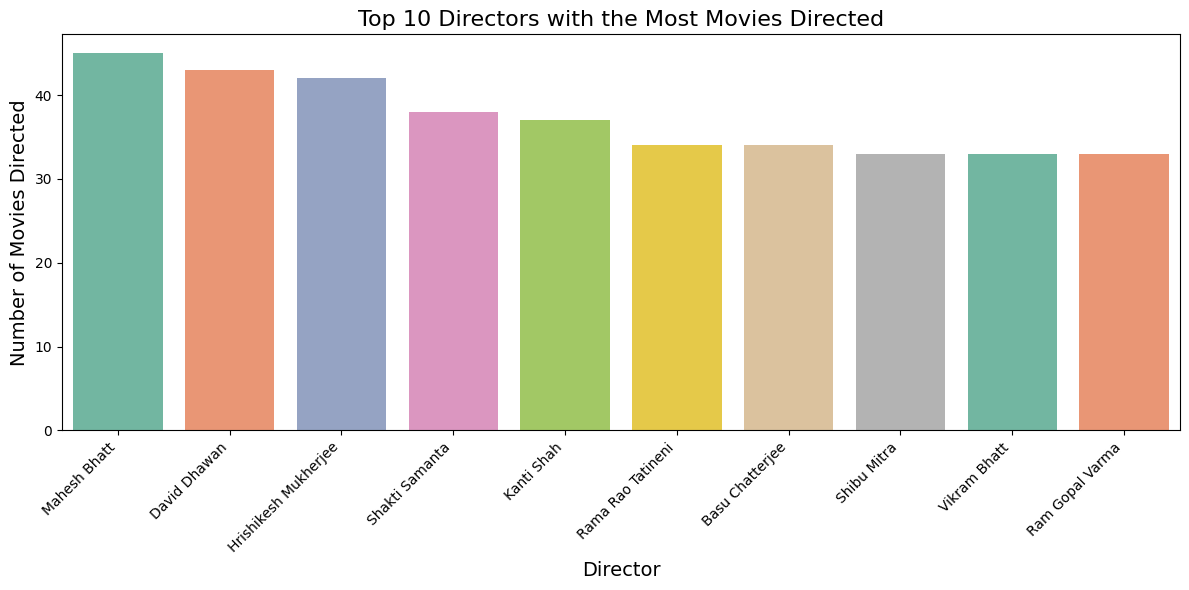

In [ ]:
# Count and visualize top 10 directors by number of movies directed
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set2')

plt.title('Top 10 Directors with the Most Movies Directed', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Number of Movies Directed', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


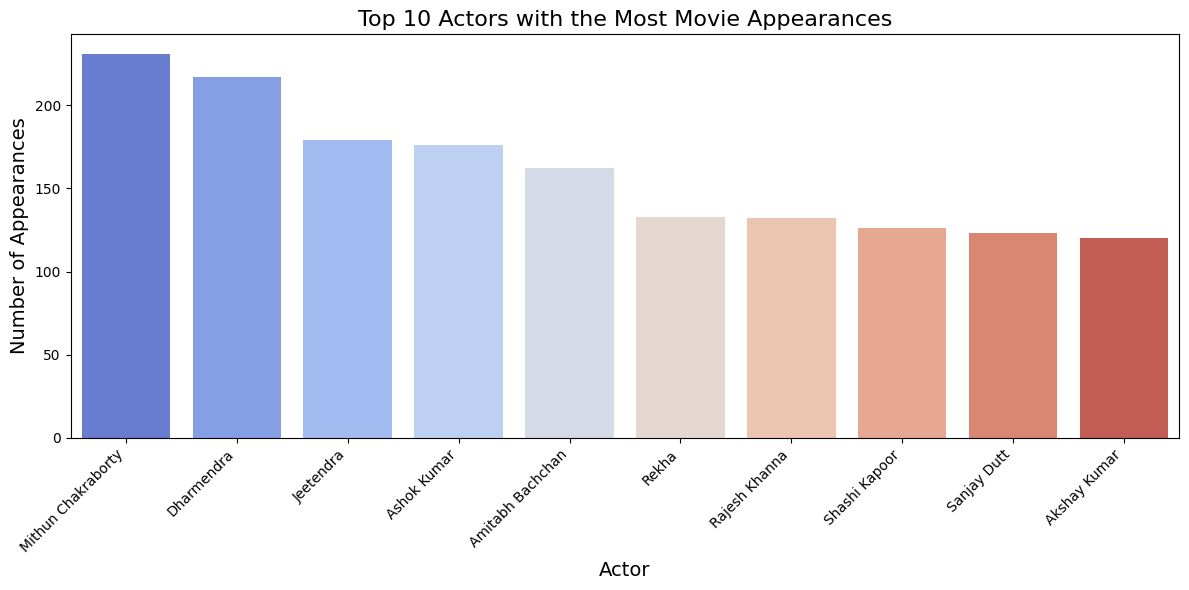

In [ ]:
# Count and visualize top 10 actors by total movie appearances
actor_counts = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()
top_actors = actor_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.index, y=top_actors.values, palette='coolwarm')

plt.title('Top 10 Actors with the Most Movie Appearances', fontsize=16)
plt.xlabel('Actor', fontsize=14)
plt.ylabel('Number of Appearances', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


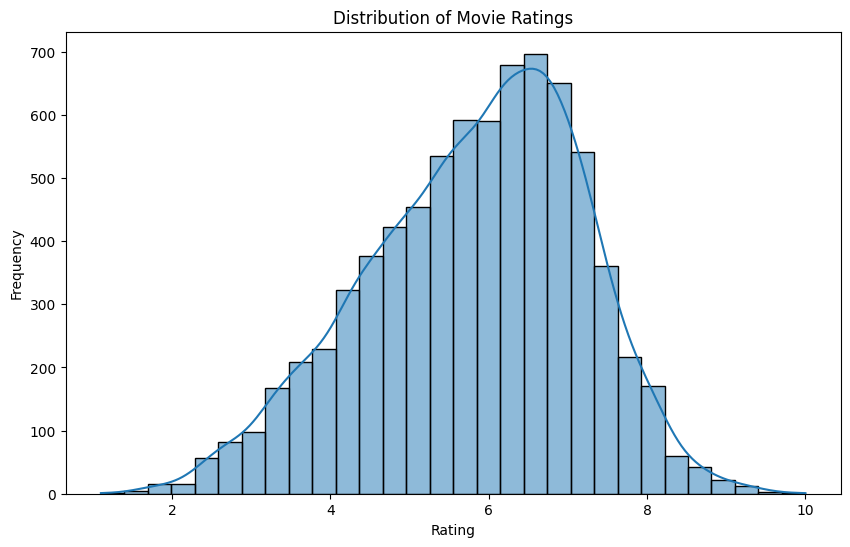

In [ ]:
# rating analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

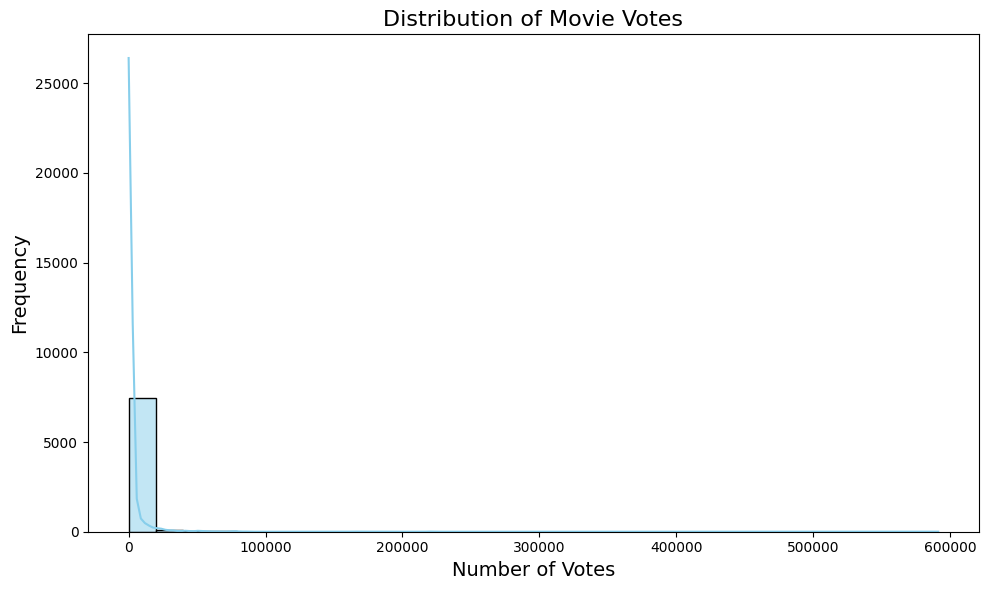

In [ ]:
# Analyze distribution of movie votes
plt.figure(figsize=(10, 6))
sns.histplot(df['Votes'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Movie Votes', fontsize=16)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

# DATA PREPROCESSING

In [ ]:
# Create a new DataFrame with relevant columns and drop rows with NaNs
df_model = df[['Genre', 'Director', 'Duration', 'Votes', 'Year', 'Rating']].dropna()

X = df_model.drop('Rating', axis=1)
y = df_model['Rating']

In [ ]:
X.head()

,Genre,Director,Duration,Votes,Year
1,Drama,Gaurav Bakshi,109.0,8,2019
3,"Comedy, Romance",Ovais Khan,110.0,35,2019
5,"Comedy, Drama, Musical",Rahul Rawail,147.0,827,1997
6,"Drama, Romance, War",Shoojit Sircar,142.0,1086,2005
8,"Horror, Mystery, Thriller",Allyson Patel,82.0,326,2012


In [ ]:
X.select_dtypes(include=['number']).corr()


,Duration,Votes,Year
Duration,1.000000,0.095557,-0.279118
Votes,0.095557,1.000000,0.134255
Year,-0.279118,0.134255,1.000000


In [ ]:
# One-hot encode categorical features
categorical = ['Genre', 'Director']
numerical = ['Duration', 'Votes', 'Year']

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cat = pd.DataFrame(encoder.fit_transform(X[categorical]).toarray()) # Convert to dense array
encoded_cat.columns = encoder.get_feature_names_out(categorical)
encoded_cat.index = X.index # Align indices with original X

encoded_cat.head()

,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Director_Zaid Ali Khan,Director_Zaigham Ali Syed,Director_Zaigham Imam,Director_Zanane Rajsingh,Director_Zeishan Quadri,Director_Zia Sarhadi,Director_Ziaullah Khan,Director_Zoya Akhtar,Director_Zubair Khan,Director_Zunaid Memon
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Featured Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy and drop non-feature columns
trans_data = df.drop(['Name'], axis=1).copy()

# Define columns to label encode
label_cols = ['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre']

# Apply Label Encoding to each column with separate encoders
for col in label_cols:
    encoder = LabelEncoder()

    if col == 'Genre' and isinstance(df['Genre'].iloc[0], list):
        # Convert list to string (e.g., ['Drama', 'Action'] → 'Drama, Action')
        trans_data[col] = encoder.fit_transform(df[col].apply(lambda x: ', '.join(x)))
    else:
        trans_data[col] = encoder.fit_transform(df[col])

# Preview the transformed data
trans_data.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,252,7.0,8,759,1707,2761,377
3,2019,110.0,205,4.4,35,1648,1519,879,2572
5,1997,147.0,175,4.7,827,1895,489,84,2449
6,2005,142.0,315,7.4,1086,2501,893,1370,3029
8,2012,82.0,351,5.6,326,161,2411,1441,1205


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(trans_data.values)
scaled_df = pd.DataFrame(scaled_array, columns=trans_data.columns)
scaled_df.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.605769,0.662921,0.000005,0.255384,0.699590,0.979773,0.123082
1,0.980769,0.296667,0.492788,0.370787,0.000051,0.554509,0.622541,0.311923,0.839700
2,0.769231,0.420000,0.420673,0.404494,0.001390,0.637618,0.200410,0.029808,0.799543
3,0.846154,0.403333,0.757212,0.707865,0.001828,0.841521,0.365984,0.486160,0.988900
4,0.913462,0.203333,0.843750,0.505618,0.000543,0.054172,0.988115,0.511356,0.393405


# Modeling

# Baseline Model - Linear Regression

In [ ]:
# Specify the numerical columns to be scaled
numerical_columns = ['Year', 'Duration', 'Votes']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
X_numeric_scaled = scaler.fit_transform(X[numerical_columns])

# Create a DataFrame for the scaled features
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numerical_columns, index=X.index) # Align indices with original X
X_numeric_scaled_df.head()

,Year,Duration,Votes
1,0.980769,0.293333,0.000005
3,0.980769,0.296667,0.000051
5,0.769231,0.420000,0.001390
6,0.846154,0.403333,0.001828
8,0.913462,0.203333,0.000543


In [ ]:
# combine the scaled columns and onehotencoded columns
X_final = pd.concat([X_numeric_scaled_df,encoded_cat ], axis=1)
X_final.head()

,Year,Duration,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family",...,Director_Zaid Ali Khan,Director_Zaigham Ali Syed,Director_Zaigham Imam,Director_Zanane Rajsingh,Director_Zeishan Quadri,Director_Zia Sarhadi,Director_Ziaullah Khan,Director_Zoya Akhtar,Director_Zubair Khan,Director_Zunaid Memon
1,0.980769,0.293333,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.980769,0.296667,0.000051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.769231,0.420000,0.001390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.846154,0.403333,0.001828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.913462,0.203333,0.000543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Instantiate StandardScaler
scaler = MinMaxScaler()

# Reshape 'Rating' to a 2D array for StandardScaler
y_scaled = scaler.fit_transform(df['Rating'].values.reshape(-1, 1))

# Convert 'y_scaled' back to a DataFrame
y = pd.DataFrame(y_scaled, columns=['Rating'])
y

,Rating
0,0.662921
1,0.370787
2,0.404494
3,0.707865
4,0.505618
...,...
7622,0.471910
7623,0.528090
7624,0.393258
7625,0.382022


In [ ]:
X.head(5)

,Genre,Director,Duration,Votes,Year
1,Drama,Gaurav Bakshi,109.0,8,2019
3,"Comedy, Romance",Ovais Khan,110.0,35,2019
5,"Comedy, Drama, Musical",Rahul Rawail,147.0,827,1997
6,"Drama, Romance, War",Shoojit Sircar,142.0,1086,2005
8,"Horror, Mystery, Thriller",Allyson Patel,82.0,326,2012


In [ ]:
y.head(5)

,Rating
0,0.662921
1,0.370787
2,0.404494
3,0.707865
4,0.505618
